In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Walmart Data Analysis and Forcasting.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
df.describe(include= 'all')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
unique,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,05-02-2010,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.000000,NaN,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,NaN,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,NaN,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,NaN,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,NaN,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000


In [74]:
time = pd.to_datetime(df['Date'],format=('%d-%m-%Y'))
time['Year']=time.dt.year

C:\Users\M.COmputer\AppData\Local\Temp\ipykernel_12332\2701971186.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a =sns.countplot(x=time['Year'],data=plot,palette='magma')


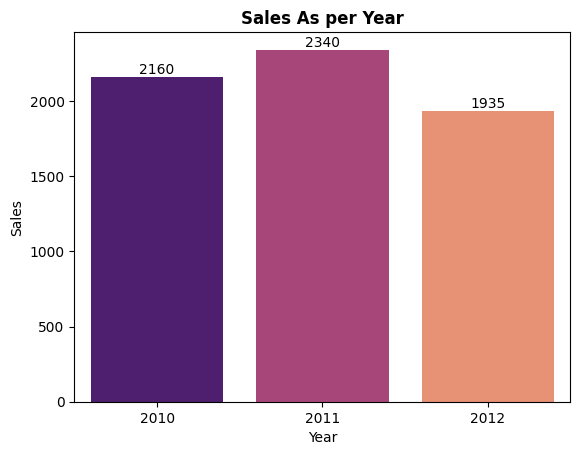

In [75]:
plot= df.groupby(time['Year']).agg({'Weekly_Sales':'sum'}).reset_index()
a =sns.countplot(x=time['Year'],data=plot,palette='magma')
plt.title('Sales As per Year',fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Sales')

for bars in a.containers:
    a.bar_label(bars)


In [6]:
date = pd.to_datetime(df['Date'],format=('%d-%m-%Y'))
date['Year']= date.dt.year

In [63]:
time = pd.to_datetime(df['Date'],format=('%d-%m-%Y'))
time['Month']=time.dt.strftime('%b')

Text(0, 0.5, 'Sales')

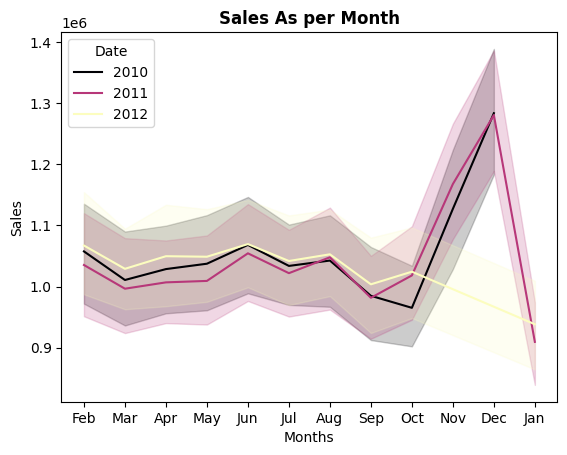

In [72]:
chart = df.groupby(time['Month']).agg({'Weekly_Sales':'sum'}).reset_index()
sns.lineplot(x=time['Month'],y='Weekly_Sales',hue=date['Year'], data=df,palette='magma')
plt.title('Sales As per Month',fontweight='bold')
plt.xlabel('Months')
plt.ylabel('Sales')

Text(0, 0.5, 'Fuel Price')

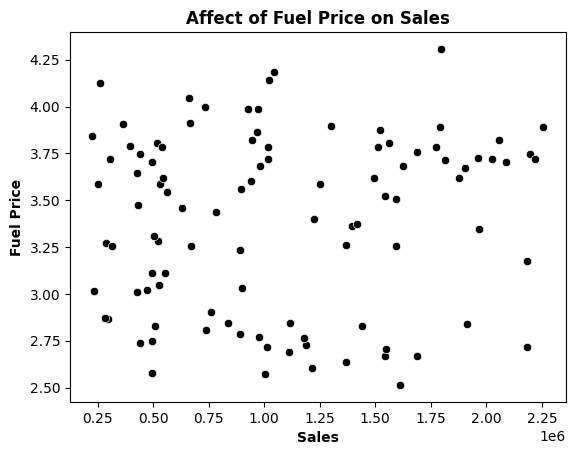

In [11]:
data = df.sample(100)
sns.scatterplot(x='Weekly_Sales',y='Fuel_Price',data=data,color='black')
plt.title('Affect of Fuel Price on Sales',fontweight='bold',fontsize=12)
plt.xlabel('Sales',fontweight='bold')
plt.ylabel('Fuel Price',fontweight='bold')

In [12]:
date = pd.to_datetime(df['Date'],format=('%d-%m-%Y'))
date['Year']= date.dt.year

Text(0.5, 1.0, 'Unemloyment vs Sales')

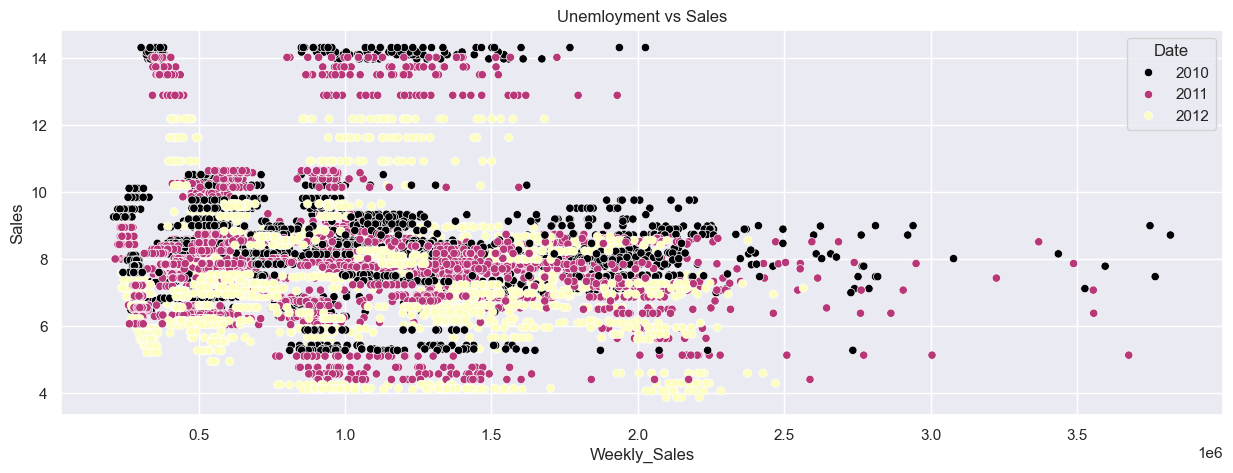

In [22]:
sns.scatterplot(x='Weekly_Sales',y='Unemployment',data = df,palette='magma',hue=date['Year']),df.sample(100)
sns.set(rc={'figure.figsize':(15,5)})
plt.ylabel('Sales')
plt.title('Unemloyment vs Sales')


In [25]:
mean_10 = df[date['Year']==2010]
x = np.mean(mean_10['CPI'])
mean_11 = df[date['Year']==2011]
y = np.mean(mean_11['CPI'])
mean_12 = df[date['Year']==2012]
z = np.mean(mean_12['CPI'])
print(x)
print(y)
print(z)

168.10178151300926
171.5457159765812
175.4987808597416


In [16]:
#Taking mean of CPI's of all years and adding them into new column
df.insert(loc=8,column='CPI_mean',value=x)
df.loc[date['Year'] == 2010, 'CPI_mean'] = x
df.loc[date['Year'] == 2011, 'CPI_mean'] = y
df.loc[date['Year'] == 2012, 'CPI_mean'] = z
df.head(200)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,CPI_mean
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,168.101782
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,168.101782
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,168.101782
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,168.101782
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,168.101782
...,...,...,...,...,...,...,...,...,...
195,2,04-02-2011,1929346.23,0,38.25,2.989,212.224065,8.028,171.545716
196,2,11-02-2011,2168041.61,1,33.19,3.022,212.592862,8.028,171.545716
197,2,18-02-2011,2080884.82,0,57.83,3.045,212.903312,8.028,171.545716
198,2,25-02-2011,1833511.08,0,60.80,3.065,213.190421,8.028,171.545716


Text(0, 0.5, 'Sales')

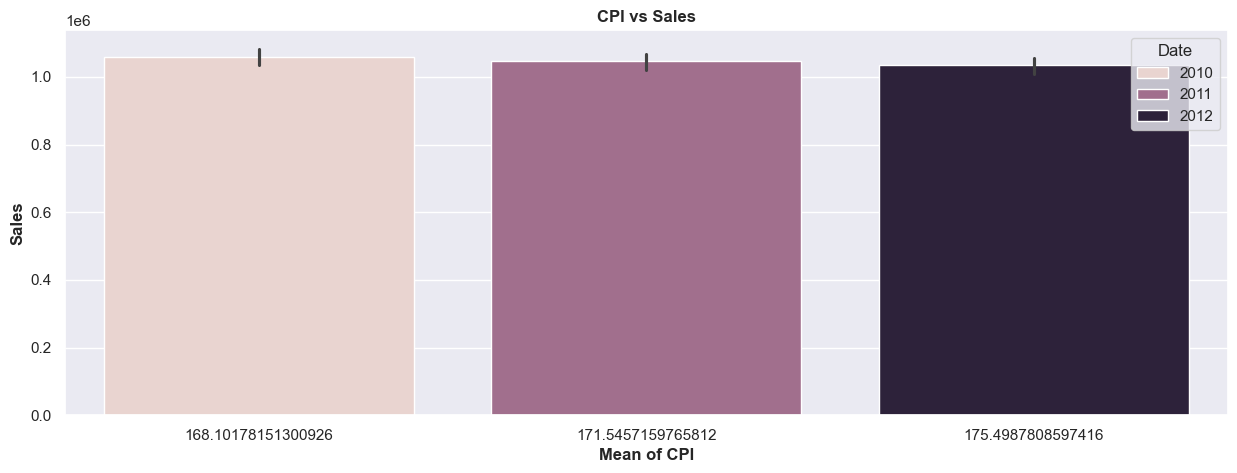

In [22]:
sns.barplot(x='CPI_mean',y='Weekly_Sales',hue=date['Year'],data=df)
plt.title('CPI vs Sales',fontweight='bold')
plt.xlabel('Mean of CPI',fontweight='bold')
plt.ylabel('Sales',fontweight= 'bold')